In [1]:
import numpy as np
from os import listdir
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt

In [2]:
tar_size = (256,256)
f_name = "mask_new_256.npz"

In [3]:
#Load all images
def load_images(path_src,path_tar,size=tar_size):
    src_list,tar_list = list(),list()
    
    for image_src,image_tar in zip(listdir(path_src),listdir(path_tar)):
        pixels_src = load_img(path_src+image_src,target_size = size)
        pixels_src = img_to_array(pixels_src)
        
        pixels_tar = load_img(path_tar+image_tar,target_size = size)
        pixels_tar = img_to_array(pixels_tar)
        
        src_list.append(pixels_src),tar_list.append(pixels_tar)
        
    return [np.asarray(src_list),np.asarray(tar_list)]

In [4]:
path_src = 'data/no_mask/'
path_tar = "data/mask/"
src_images,tar_images = load_images(path_src,path_tar)

print("Loaded :: {},{}".format(tar_images.shape,src_images.shape))

filename = "data/"+f_name
np.savez_compressed(filename,src_images,tar_images)

print("Saved Dataset : {}".format(filename))

Loaded :: (50, 256, 256, 3),(50, 256, 256, 3)
Saved Dataset : data/mask_new_256.npz


In [5]:
data = np.load("data/mask_new_256.npz")
src_images,tar_images = data["arr_0"],data["arr_1"]

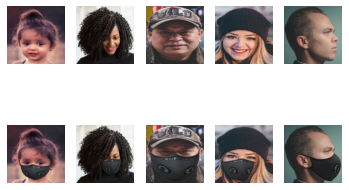

In [6]:
n_samples = 5
for i in range(n_samples):
    plt.subplot(2,n_samples,i+1)
    plt.axis("off")
    plt.imshow(src_images[i].astype("uint8"))
for i in range(n_samples):
    plt.subplot(2,n_samples,i+1+n_samples)
    plt.axis("off")
    plt.imshow(tar_images[i].astype("uint8"))
plt.show()

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

import numpy as np
from os import listdir
from matplotlib import pyplot as plt
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array
from tensorflow.python.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Input,Concatenate
from tensorflow.python.keras.layers import Conv2D,LeakyReLU
from tensorflow.python.keras.layers import BatchNormalization,Dropout
from tensorflow.python.keras.layers import Activation,Conv2DTranspose
from tensorflow.python.keras.models import Model,load_model

In [2]:
n_model=load_model("model_009000.h5")

In [5]:
from numpy import expand_dims
# load an image
def load_image(filename, size=(256,256)):
	# load image with the preferred size
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	# reshape to 1 sample
	pixels = expand_dims(pixels, 0)
	return pixels

In [12]:
src_image = load_image('test/deepika3.jpg')
x = n_model.predict(src_image)
x = (x + 1) / 2.0

InternalError:  cuDNN launch failure : input shape([1,3,256,256]) filter shape([4,4,3,64])
	 [[node model_1/conv2d_6/Conv2D (defined at <ipython-input-4-d6655faba922>:2) ]] [Op:__inference_predict_function_2722]

Function call stack:
predict_function


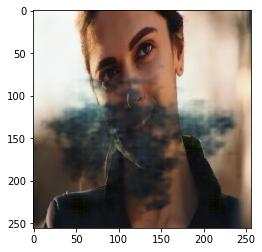

In [11]:
plt.imshow(x[0])